In [15]:
# Miguel Ángel Hernández Tapia

# IMPORTING LIBRARIES
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data

In [16]:
# TWO GROUPS OF DATA OF ORDERED NUMBER PAIRS ARE CREATED, 3 CLASSES, ONE OF 200 AND ANOTHER OF 10

training_data, labels = make_blobs(n_samples = 100, centers = 2, cluster_std = 2.5, random_state = 9)
test_data, labels_test = make_blobs(n_samples = 10, centers = 2, cluster_std = 2.5, random_state = 9)


In [17]:
# PLOT                #'Viridis' 'Rdbu' 'Cividis'

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x = training_data[:,0], y = training_data[:,1],marker=dict(color=labels,colorscale='Viridis', showscale=True)))
fig.add_trace(go.Scatter(x = test_data[:,0], y = test_data[:,1],fillcolor = "orange"))

fig.update_traces(mode='markers', marker_line_width=1, marker_size=12)
fig.update_layout(title='Data')

fig.show()

In [18]:
# Conversion to a DataFrame

df = pd.DataFrame({"Train X": training_data[:,0],"Train Y":training_data[:,1], "Class": labels})
dft = pd.DataFrame({"Test X": test_data[:,0], "Test Y" : test_data[:,1], "Class": labels_test})

print("\n", df , "\n\n", dft ,"\n")



       Train X    Train Y  Class
0  -10.781223   3.248461      0
1    2.003668  -9.453210      1
2   -4.598112  -6.247412      1
3    2.683953 -10.315294      1
4   -8.798945   4.186751      0
..        ...        ...    ...
95   3.813861  -8.689160      1
96  -7.497152   0.988766      0
97  -9.998986   6.175448      0
98  -3.398593  -4.980838      1
99  -5.558422  -4.205846      0

[100 rows x 3 columns] 

       Test X    Test Y  Class
0 -13.585845 -1.189688      0
1   3.772290 -9.575212      1
2  -0.427347 -4.079462      1
3 -10.738421 -1.165347      0
4 -10.394218 -1.582377      0
5   2.210831 -6.372136      1
6  -8.202789  4.387785      0
7   4.472505 -6.246487      1
8  -9.050811  1.806251      0
9   1.603644 -7.243514      1 



# Manual Implementation

In [19]:
def KNeighbors(train, test, l):
    # Initialize lists to store distances, labels, min values, squared distances, and labels of min values.
    d=[];Dl=[];minima=[];D=[];Lminima=[]

    # Loop through every point in the test set
    for i in test:
        # For each test point, loop through every point in the train set
        for j in train:
            # Compute the element-wise difference between the test and train point and append to list d
            d.append([e1 - e2 for e1, e2 in zip(i,j)])
            # Append the label of the train point to Dl
            Dl.append(l[train.index(j)])
        # Compute squared distance for each element-wise difference and store in list D
        D = [w[0]**2 + w[1]**2 for w in d]

    # For each test point, find the minimum squared distance to all train points
    for i in range(len(test)):
        # Get the minimum squared distance and its associated label
        minima.append(min(D[i*len(train):(i+1)*len(train)]))
        Lminima.append(Dl[D.index(minima[i])])

    # Print the minimum distances and their associated labels
    print("Minimum distance: ", minima , "\nClass: ", Lminima)

    return minima, Lminima


# Results


In [20]:
# Data type to a list variable
test = test_data.tolist()
train = training_data.tolist()
lab = labels.tolist()

minima, Lminima = KNeighbors(train, test, lab)

Minimum distance:  [0.0, 0.7868171603594964, 0.9607108763696425, 0.0, 0.0, 0.19039809310518657, 0.0, 3.7887070174687443, 0.0, 0.3358265969339262] 
Class:  [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]


ACCURACY
1.0

Confusion Matrix


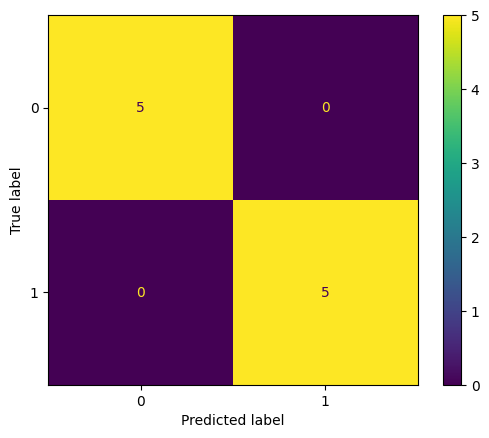

In [23]:
# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Confusion matrix
cm = confusion_matrix(labels_test, Lminima)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

# accuracy
acc = accuracy_score(labels_test,Lminima)


# printing results
print("ACCURACY")
print(acc)
print("\nConfusion Matrix")
disp.plot()
plt.show()

# SKLearn Implementation

In [53]:
# Code from: https://plotly.com/python/knn-classification/

from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 0.25

X = np.vstack((training_data, test_data))
y = np.append(labels, labels_test )

X_train, y_train = training_data, labels
X_test, y_test = test_data, labels_test

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


In [54]:
import plotly.graph_objects as go

# Define specifications for the traces.
trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

# Create a scatter plot for each specification in trace_specs
fig = go.Figure(data=[
      go.Scatter(
          x=X[y.astype(str)==label, 0],
          y=X[y.astype(str)==label, 1],     # Convert y to string and filter
          name=f'{split} Split, Label {label}',
          mode='markers',
          marker_symbol=marker
      )
      for X, y, label, split, marker in trace_specs
])


# Update the appearance of the markers
fig.update_traces(
    marker_size=12,             # Size of the marker
    marker_line_width=1.5,      # Width of the marker outline
    marker_color="lightyellow"  # Color of the marker
)

# Add a contour plot to the figure to show decision boundaries or regions
fig.add_trace(
    go.Contour(
        x=xrange,         # x range for the contour
        y=yrange,         # y range for the contour
        z=Z,              # Values for the contour levels
        showscale=False,  # Don't show the color scale
        colorscale='RdBu',  # Color scale to use
        opacity=0.4,      # Opacity of the contour
        name='Score',     # Name for the contour trace
        hoverinfo='skip'  # Don't show hover information for the contour
    )
)

# Display the figure
fig.show()
